# Initial Setup

In [33]:
%%time

# Load packages.
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm

from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize, poly

from statsmodels.stats.anova import anova_lm

from matplotlib import pyplot as plt

%matplotlib inline

CPU times: user 825 µs, sys: 0 ns, total: 825 µs
Wall time: 839 µs


## Ancillary Functions

In [2]:
def abline(ax , b, m, *args , ** kwargs):
    "Add a line with slope m and intercept b to ax"
    
    xlim = ax.get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim , *args , ** kwargs)

# Exercises

## Applied

### Question 8 

**This question involves the use of simple linear regression on the Auto data set.**

**(a) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output.**

In [3]:
dataset = "Auto"
df = load_data(dataset)

In [4]:
# Show it.
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
# Prepare response and predictor.
dfy = df[["mpg"]].copy(deep=True)
dfX = df[["horsepower"]].copy(deep=True)
dfX.insert(loc=0, column="intercept", value=1)

In [6]:
%%time

# Fit.
results = sm.OLS(endog=dfy, exog=dfX).fit()

CPU times: user 3.06 ms, sys: 553 µs, total: 3.61 ms
Wall time: 2.95 ms


In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 02 May 2024   Prob (F-statistic):           7.03e-81
Time:                        08:47:30   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(a) i. Is there a relationship between the predictor and the response?**

Since p-val is around 0.000, we can conclude that there is a relationship between the predictor and the response.

**(a) ii. How strong is the relationship between the predictor and the response?**

$$
\frac{\partial y}{\partial X} = \beta \approx -0.1578 
$$

**(a) iii. Is the relationship between the predictor and the response positive or negative?**

Negative.

**(a) iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?**

In [8]:
%time

prediction = results.get_prediction(
    pd.DataFrame({
        "intercept": [1],
        "horsepower": [98]
    })
)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 11.4 µs


In [9]:
# Predicted value.
prediction.predicted

array([24.46707715])

In [10]:
# Confidence interval.
prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [11]:
# Prediction intervals.
prediction.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

**(b) Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.**

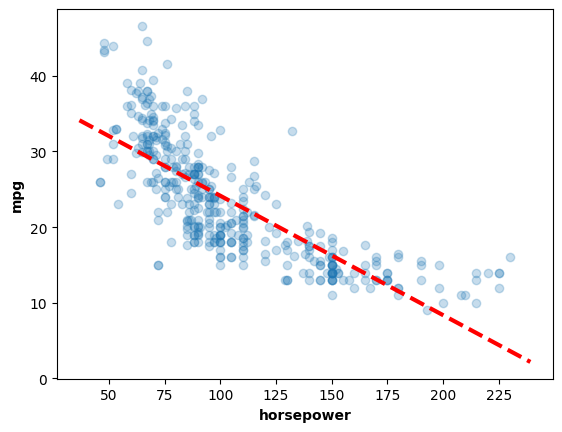

In [12]:
ax = plt.scatter(x=dfX[["horsepower"]], y=dfy, alpha=0.25)
plt.xlabel("horsepower", weight="bold")
plt.ylabel("mpg", weight="bold")
abline(ax.axes, results.params[0], results.params[1], 'r--', linewidth =3)

**(c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.**

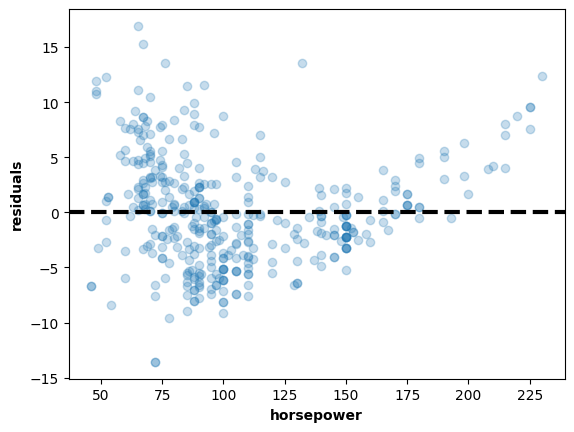

In [13]:
ax = plt.scatter(x=dfX[["horsepower"]], y=results.resid, alpha=0.25)
plt.axhline(y=0, c="k", ls="--", lw=3)
plt.xlabel("horsepower", weight="bold")
plt.ylabel("residuals", weight="bold");

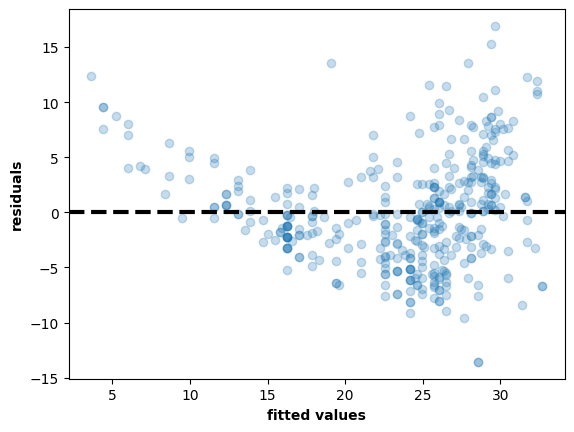

In [14]:
ax = plt.scatter(results.fittedvalues , results.resid, alpha=0.25)
plt.axhline(y=0, c="k", ls="--", lw=3)
plt.xlabel("fitted values", weight="bold")
plt.ylabel("residuals", weight="bold");

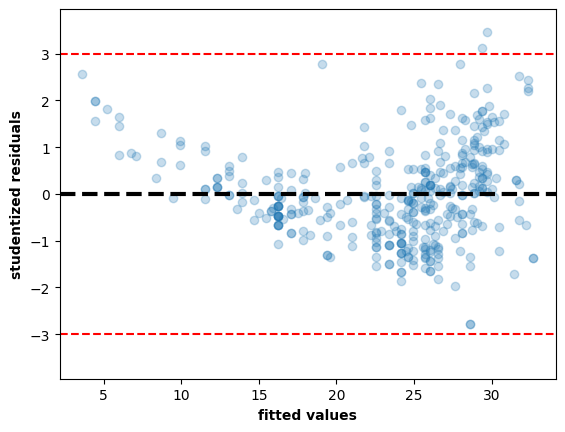

In [15]:
infl = results.get_influence()
ax = plt.scatter(results.fittedvalues , infl.resid_studentized_internal, alpha=0.25)
plt.axhline(y=0, c="k", ls="--", lw=3)
plt.axhline(y=+3, c="r", ls="--", lw=1.5)
plt.axhline(y=-3, c="r", ls="--", lw=1.5)
plt.ylim((-3.95, 3.95))
plt.xlabel("fitted values", weight="bold")
plt.ylabel("studentized residuals", weight="bold");

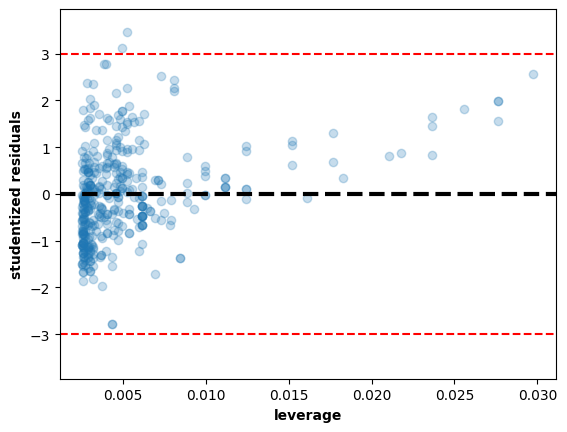

In [16]:
ax = plt.scatter(infl.hat_matrix_diag , infl.resid_studentized_internal, alpha=0.25)
plt.axhline(y=0, c="k", ls="--", lw=3)
plt.axhline(y=+3, c="r", ls="--", lw=1.5)
plt.axhline(y=-3, c="r", ls="--", lw=1.5)
plt.ylim((-3.95, 3.95))
plt.xlabel("leverage", weight="bold")
plt.ylabel("studentized residuals", weight="bold");

### Question 9

**This question involves the use of multiple linear regression on the Auto data set.**

**(a) Produce a scatterplot matrix which includes all of the variables in the data set.**

CPU times: user 7.95 s, sys: 207 ms, total: 8.16 s
Wall time: 7.76 s


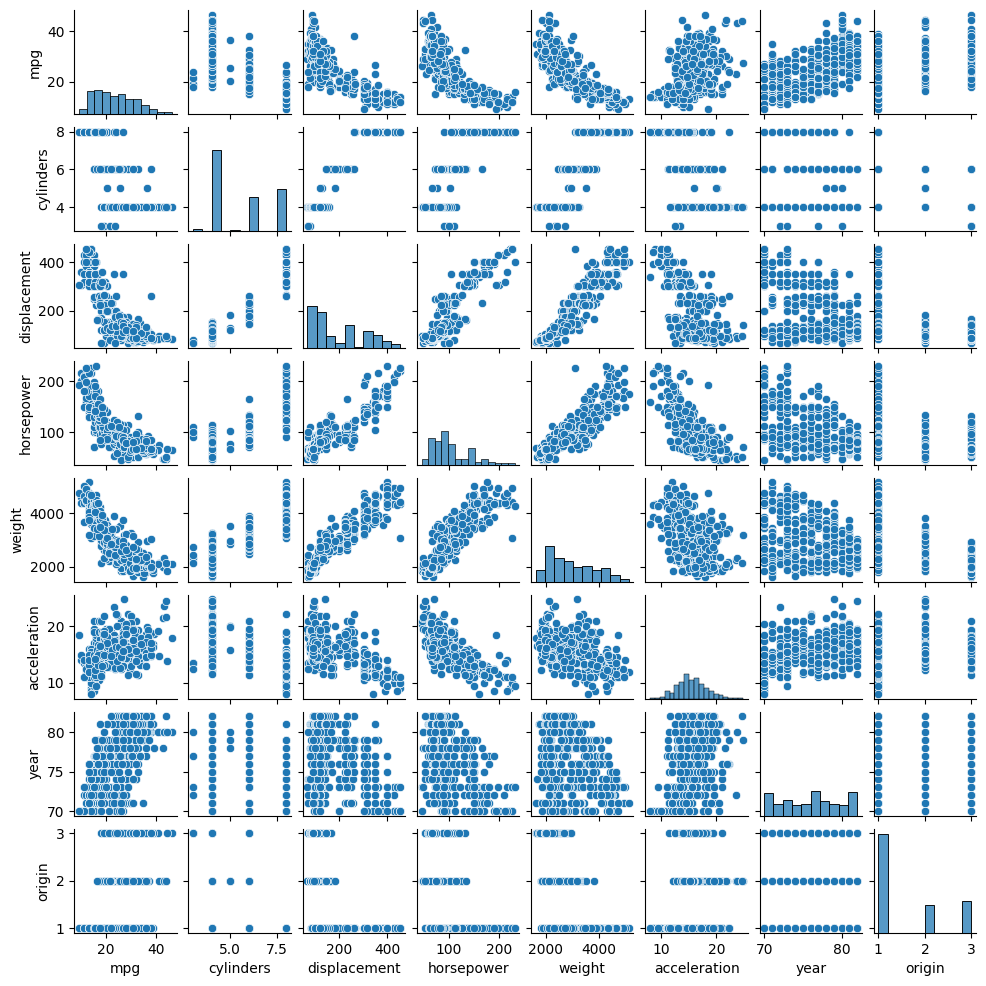

In [17]:
%%time

sns.pairplot(df, height=1.25)

**(b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.**

In [18]:
df.corr()

/tmp/ipykernel_27816/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


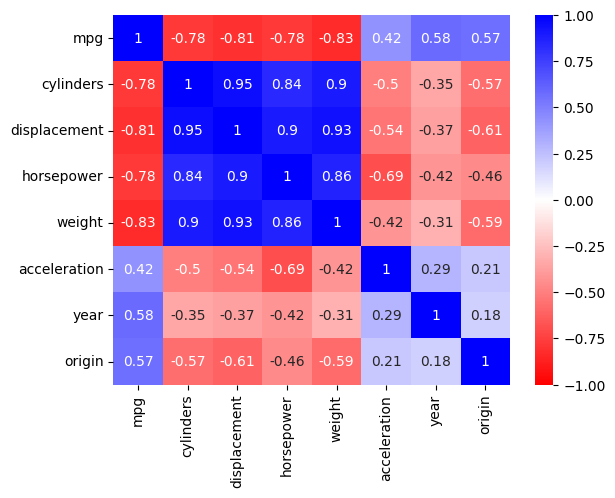

In [19]:
sns.heatmap(data=df.iloc[:, :-1].corr(), cmap=plt.cm.bwr_r, vmin=-1, vmax=1, annot=True);

**(c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output.**

In [20]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [42]:
%%time

dfX = MS(
    terms=["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"],
    intercept=True
).fit_transform(df)

model = sm.OLS(dfy, dfX)
results = model.fit()

# Show it.
results.summary()

CPU times: user 69.3 ms, sys: 3.27 ms, total: 72.6 ms
Wall time: 73.2 ms


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 02 May 2024   Prob (F-statistic):          2.04e-139
Time:                        09:23:54   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**(c) i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.**